# DV Lab 06 

### Perform the following Tasks in Seaborn

##### Import the required libraries and data from csv file "sales_data" and perform the following tasks on it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

C:\Users\Zubair\AppData\Local\Temp\ipykernel_11760\3164073743.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('sales_data.csv')
df

,order_id,product,category,price,quantity,customer_country
0,1000,Necklace,Jewelry,189.32,1,Australia
1,1001,Laptop,Electronics,133.76,4,Australia
2,1002,Pants,Clothing,42.84,4,Canada
3,1003,Sunglasses,Accessories,54.85,3,Canada
4,1004,Pants,Clothing,142.53,5,UK
...,...,...,...,...,...,...
295,1295,Headphones,Electronics,15.78,2,UK
296,1296,Necklace,Jewelry,195.22,2,Australia
297,1297,Bracelet,Jewelry,172.30,3,France
298,1298,Wallet,Accessories,87.71,3,US


#### Plot the total sales per category across all orders.

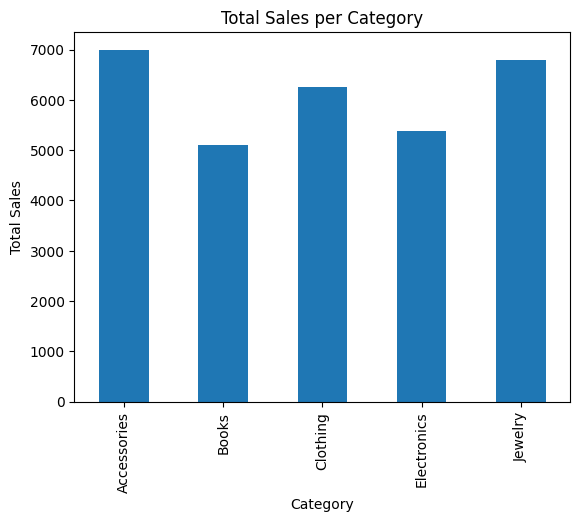

In [3]:
df.groupby('category')['price'].sum().plot(kind='bar')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

#### Visualize the relationship between product price and quantity sold. Add a regression line to show the general trend.

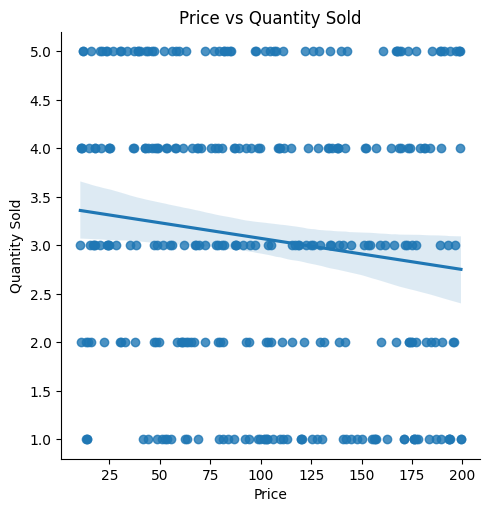

In [4]:
sns.lmplot(x='price', y='quantity', data=df)
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

#### Explore the distribution of product price within each category using violin plots. Group the plots by customer country using a facet grid.

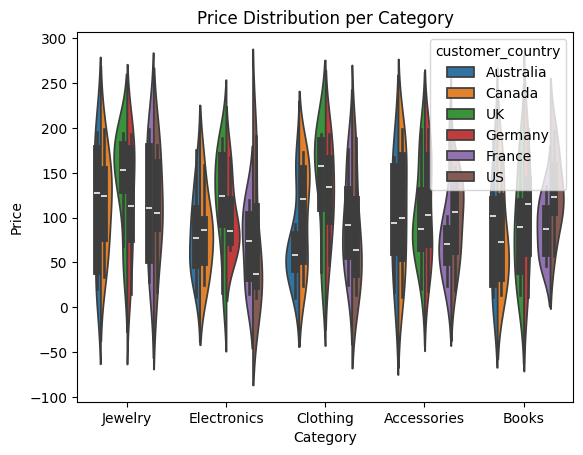

In [5]:
# Explore the distribution of product price within each category using violin plots. Group the plots by customer country using a facet grid.
sns.violinplot(x='category', y='price', data=df, hue='customer_country', split=True)
plt.title('Price Distribution per Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

#### Create a heatmap visualizing the correlation matrix between product price, quantity, and a potential additional numerical variable (e.g., shipping cost, discount applied). Apply hierarchical clustering to order categories and countries based on their correlations.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder object
le = LabelEncoder()

# Convert the categorical column to numerical values
df['category_no'] = le.fit_transform(df['category'])

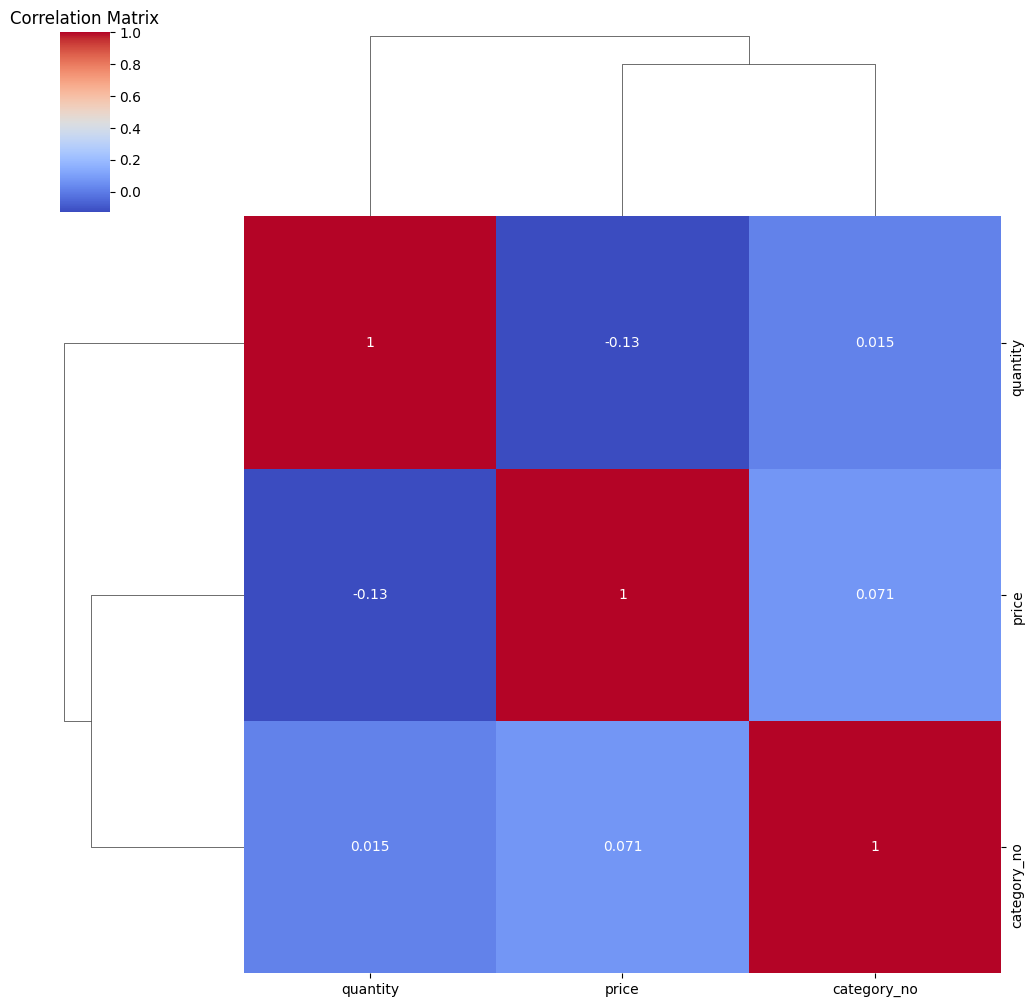

In [7]:
selected_columns = df[['price', 'quantity', 'category_no']]
corr_matrix = selected_columns.corr()
sns.clustermap(corr_matrix, method='ward', cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Explore the relationships between all numerical variables in your data (price, quantity, shipping cost, etc.) using a pairplot. This provides a quick overview of pairwise correlations and potential outliers.

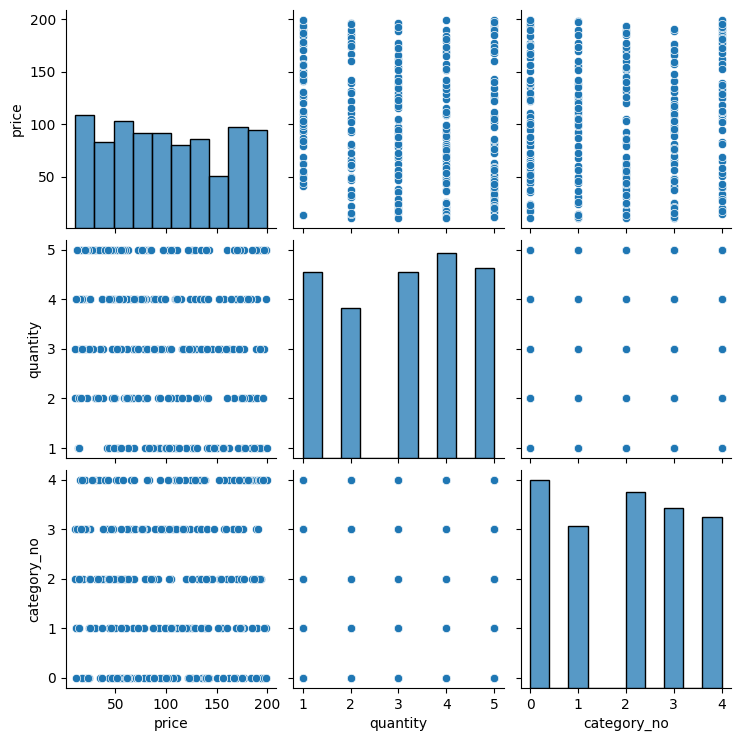

In [8]:
# Explore the relationships between all numerical variables in your data (price, quantity, shipping cost, etc.) using a pairplot. This provides a quick overview of pairwise correlations and potential outliers.
sns.pairplot(df[['price', 'quantity', 'category_no']])
plt.show()

### Perform the Following Tasks in Plotly 

#### Plot the total sales per category using an interactive bar chart where users can hover over bars to see details (category and total sales).

In [9]:
# Plot the total sales per category using an interactive bar chart where users can hover over bars to see details (category and total sales).
import plotly.express as px
fig = px.bar(df.groupby('category')['price'].sum().reset_index(), x='category', y='price', title='Total Sales per Category')
fig.show()

#### Create a scatter plot visualizing the relationship between product price and quantity sold, color-coded by customer country.

In [10]:
# Create a scatter plot visualizing the relationship between product price and quantity sold, color-coded by customer country.
fig = px.scatter(df, x='price', y='quantity', color='customer_country', title='Price vs Quantity Sold')
fig.show() 

#### Create a scatter plot visualizing the relationship between product price and quantity sold, color-coded by customer country.

In [11]:
# Create a scatter plot visualizing the relationship between product price and quantity sold, color-coded by customer country.
fig = px.scatter(df, x='price', y='quantity', color='customer_country', title='Price vs Quantity Sold')
fig.show()

#### Visualize the average order value per country on a world map, colored by the average value.

In [12]:
# Visualize the average order value per country on a world map, colored by the average value.
avg_order_value = df.groupby('customer_country')['price'].mean().reset_index()
fig = px.choropleth(avg_order_value, locations='customer_country',
                    locationmode='country names',
                    color='price',
                    title='Average Order Value per Country')
fig.show()

#### Visualize the relationship between product price, quantity sold, and a third numerical variable (e.g., shipping cost) using a 3D scatter plot. Color-code the data points based on the customer country.

In [14]:
# Visualize the relationship between product price, quantity sold, and a third numerical variable (e.g., shipping cost) using a 3D scatter plot. Color-code the data points based on the customer country.
fig = px.scatter_3d(df, x='price', y='quantity', z='category_no', color='customer_country', title='Price vs Quantity vs Shipping Cost')
fig.show()